In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

# E7: Lab Assignment 04 - Iteration & Recursion

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## Instructions

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question   | Points
:---       | --:
1          | 4
2.0 – 2.2  | 8
3          | 3
4          | 4
5          | 3
6          | 3
Total      | 25

**Run the cell below**, to import the required modules.

In [2]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import random
import hashlib
import matplotlib.pyplot as plt
import inspect
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Interest

The interest rate, $r$, on a principal investment, $P_0$, is a payment for allowing the bank to use an investor's money. Compound interest is accumulated according to the formula $P_n = (1 + r)P_{n-1}$, where $P_n$ is the balance after $n$ compounding periods (in our case years), and $P_{n-1}$ is the balance after the previous period. The interest rate $r$ is given
in decimal, e.g. 0.1, which is 10%. The objective is to determine the number of years required to reach an investment goal based on an initial investment $P_0$ and an interest rate $r$.

You will need to complete the function below, `mySavingsPlan(P0, r, goal)`, which returns `years`, the number of years required to reach an investment goal. Assume that interest is paid out in one payment at the end of a given year. The output `years` should be a whole number.

Complete the function below to solve the investment problem using a while loop. There are hints to guide you on what is missing on each line.

Test your `mySavingsPlan()` function for `P0 = 1000` dollars, `r = 0.05`, and `goal = 10000` dollars. Assign the output to `q1`. Feel free to try it for other inputs.

In [3]:
# ANSWER CELL
def mySavingsPlan(P0, r, goal):
    """Return number of years required to reach an investment goal based on an initial investment P0 and an interest rate r.
    >>> mySavingsPlan(1000, 0.05, 10000)
    48
    >>> mySavingsPlan(1000, 0.10, 10000)
    25
    >>> mySavingsPlan(1000, 0.05, 1000000)
    142
    """
    # Initialize number of years required to reach investment goal
    years = 0 #SOLUTION
    
    # Initialize amount of money in the current period
    money = P0 #SOLUTION
    
    """ # BEGIN PROMPT
    # Add logical expression that should be checked each time you iterate through the loop
    while ...
    """; # END PROMPT
    while money < goal: # SOLUTION NO PROMPT
        
        # Update amount of money in the next period
        money = money*(1+r) #SOLUTION
        
        # Update number of years required to reach investment goal
        years = years + 1 #SOLUTION

    return years

In [4]:
# TEST YOUR FUNCTION HERE
q1 = mySavingsPlan(P0=1000, r=0.05, goal=10000)  #SOLUTION

print(f'Number of years to reach goal: {q1} years')

Number of years to reach goal: 48 years


In [5]:
grader.check("q1")

q1 results: All test cases passed!

## Question 2: Sum Digits

### Question 2.0

Write a function `Sum(n)` that takes a non-negative integer (`n`) and returns the sum of its digits (`digit_sum`) as an integer. If `n` is negative and/or non-integer, the function should return "Invalid Input." Be careful with your string formatting. Minor differences will result in a failed test.

Test your `Sum(n)` function for  `n = 200500` in the following cell. Assign the output to `q2_0`. Feel free to try it for other inputs.

*Hint:* Strings are iterable.

```
Examples:

>>> Sum(10) # 1 + 0 = 1
1

>>> Sum(4224) # 4 + 2 + 2 + 4 = 12
12

>>> Sum(1234567890)
45

>>> Sum(-10)
'Invalid Input.'

>>> Sum(10.1)
'Invalid Input.'

>>> a = Sum(123) # make sure that you are using return rather than print
>>> a
6
```

In [6]:
# ANSWER CELL
# BEGIN SOLUTION
def Sum(n):
    # Check if input is negative or non-integer
    if n < 0 or not isinstance(n, int):
        return "Invalid Input."
    
    # Convert the number to a string to easily access its digits
    num_str = str(n)

    # Initialize the sum to 0
    digit_sum = 0

    # Iterate through each character in the string and add the integer value to the sum
    for digit_char in num_str:
        digit_sum += int(digit_char)

    return digit_sum
# END SOLUTION

In [7]:
# TEST YOUR FUNCTION HERE
q2_0 = Sum(n=200500)  #SOLUTION

print(f'Sum of  digits: {q2_0}')

Sum of  digits: 7


In [8]:
grader.check("q2.0")

q2.0 results: All test cases passed!

### Question 2.1

Create a simpler version of Q2.0 by writing a lambda function called `lambdaSum`. Your lambda function should perform the same calculation as Q2.0 with `n` as the input and sum of the digits as the output. Also, the function should return "Invalid Input." if `n` is negative and/or non-integer.

Test your new `lambdaSum` function for `n = 200500` and assign the output to `q2_1`. Feel free to try it for other inputs.

*Hint: You might need to use list comprehension and ternary operators.*

```
Examples:

>>> lambdaSum(10) # 1 + 0 = 1
1

>>> lambdaSum(4224) # 4 + 2 + 2 + 4 = 12
12

>>> lambdaSum(1234567890)
45

>>> lambdaSum(-10)
'Invalid Input.'

>>> lambdaSum(10.1)
'Invalid Input.'
```

In [9]:
# ANSWER CELL
# BEGIN SOLUTION
lambdaSum = lambda n: sum([int(i) for i in str(n)]) if n >= 0 and isinstance(n, int) else "Invalid Input."
# END SOLUTION

In [10]:
# TEST YOUR FUNCTION HERE
q2_1 = lambdaSum(n=200500)  #SOLUTION

print(f'Sum of digits: {q2_1}')

Sum of digits: 7


In [11]:
grader.check("q2.1")

q2.1 results: All test cases passed!

### Question 2.2

In the previous question, we considered one digit at a time when computing the sum. Next, we will write a similar function that computes the sum of groups of digits of a specified size.

Write a function `SumSize(n, size)` that takes a non-negative integer `n` and another integer `size` which specifies the number of digits to consider at a time. The function should return the sum of `size` consecutive digits from `n`.

For example, if `n = 200500` and `size = 2`, the function should return 20 + 05 + 00 = 25 (two consecutive digits at a time and taking their sum).

Set the default value of `size` equal to 1 and assume `n` is a valid input (you do not have to check if it is negative or float).

Note that the number of digits in `n` should be a multiple of `size`. If this is not the case, your function should return the following string:
* "The number of digits in n should be a multiple of size."

Test your `SumSize(n, size)` function for  `n = 200500` and `size = 2`. Assign the output to `q2_2`. Feel free to try it for other inputs.


```
Examples:

>>> SumSize(10) # 1 + 0 = 1 (size not specified, so use default value of 1)
1

>>> SumSize(10, 2) 
10

>>> SumSize(4224, 2) # 42 + 24 = 66
66

>>> SumSize(100001111101234, 5) # 10000 + 11111 + 01234 = 22345
22345

>>> SumSize(4224, 3)
"The number of digits in n should be a multiple of size."
```

In [12]:
# ANSWER CELL
# BEGIN SOLUTION
def SumSize(n, size=1):
    # Convert the number to a string to easily access its digits
    num_str = str(n)
    
    # check if n is a multiple of size
    if len(num_str) % size != 0:
        return "The number of digits in n should be a multiple of size."

    # Initialize the sum to 0
    digit_sum = 0

    # Iterate through a group of size characters in the string and add their integer value to the sum
    for i in range(0, len(num_str), size):
        digit_sum += int(num_str[i:i+size])

    return digit_sum
# END SOLUTION

In [13]:
# TEST YOUR FUNCTION HERE
q2_2 = SumSize(200500,2)  #SOLUTION

print(f'Sum of group of digits: {q2_2}')

Sum of group of digits: 25


In [14]:
grader.check("q2.2")

q2.2 results: All test cases passed!

## Question 3: Collatz Conjecture

The Collatz conjecture is one of the most famous unsolved problems in mathematics:

> Pick a positive integer `n`, any positive integer. If the `n` is even, divide it by 2; if it's odd, multiply it by 3 and add 1. Take that new number and repeat the process, again and again. If you keep repeating this, you'll eventually reach the number 1, regardless of which positive integer `n` is chosen initially. And if you continue the process beyond 1, you will get stuck in a loop. 

$$10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 → 2 \rightarrow 1 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow \dots$$

$$11 \rightarrow 34 \rightarrow 17 \rightarrow 52 \rightarrow 26 \rightarrow 13 \rightarrow 40 \rightarrow 20 \rightarrow 10 \rightarrow 5 \rightarrow 16 \rightarrow 8 \rightarrow 4 \rightarrow 2 \rightarrow 1 \rightarrow 4 \rightarrow \dots $$

The number `n` will travel up and down but eventually end at 1 (at least for all numbers that have ever been tried -- nobody has ever proved that the sequence will terminate). 

Write a function `collatz(n)` that takes a positive integer (`n`) and returns two outputs:
1. `sequence`: a list of the sequence starting at `n` and ending at the first occurrence of 1
2. `steps`: the number of steps in the sequence

If `n` is non-positive and/or non-integer, the function should return "Invalid Input." Be careful with your string formatting. Minor differences will result in a failed test. 

Also note that if `n == 1` initially, then the sequence is one step long.

Test your `collatz(n)` function for  `n = 25`. Assign the output to `q3`. Feel free to try it for other inputs.

```
Examples:

>>> collatz(10)
([10, 5, 16, 8, 4, 2, 1], 7)

>>> collatz(1)
([1], 1)

>>> collatz(9)
([9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1], 20)

>>> collatz(0)
'Invalid Input.'
```

In [15]:
# ANSWER CELL
# BEGIN SOLUTION
def collatz(n):
    
    # Check if input is non-positive  or non-integer
    if n <= 0 or not isinstance(n, int):
        return "Invalid Input."

    sequence = [n]
    steps = 1

    while n != 1:
        if n % 2 == 0: # Even
            n //= 2  # Integer division (floor division)
        else: # Odd
            n = 3 * n + 1
        sequence.append(n)
        steps += 1

    return sequence, steps
# END SOLUTION

In [16]:
# TEST YOUR FUNCTION HERE
q3 = collatz(n=25)  #SOLUTION

print(f'Sequence: {q3[0]}')
print(f'Number of steps to get to 1: {q3[1]}')

Sequence: [25, 76, 38, 19, 58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Number of steps to get to 1: 24


In [17]:
grader.check("q3")

q3 results: All test cases passed!

## Question 4: Rainfall Totals

Write a function `Rainfall(rainData)` that takes a numeric sequence (list, tuple, or NumPy array) of daily rainfall measurements, `rainData`, and returns the total rainfall, `rainTot`, and the average daily rainfall, `rainAvg`, over a period of interest.

The argument `rainData` may contain the number -999 indicating the end of the data from a given period. We are interested in computing the total and average daily rainfall over the first period only (everything after the first -999 should be ignored). There may be negative numbers other than -999 in`rainData`, which represent erroneous measurements and should be neglected.

Your function `myRainfall(rainData)` should return `rainTot` and `rainAvg`, which are the total and average of the non-negative values in either the entire input `rainData` or the period from the beginning until the first occurrence of -999. Note that `rainAvg` is the average daily rainfall during this period (not counting days with neglected measurements). The first returned object should be `rainTot` and the second returned object should be `rainAvg`.

Test your `myRainfall()` function for `rainData = [2.3, 4.1, -5.4, 1.0, 7.1, -2, 8, 0, 4.9, 6, -999]`. Assign the output to `q4`. Feel free to try it for other inputs.

```
Examples:

>>> myRainfall([2, 4, -5, 1, 7, -2, 8, -999, 4, 6, 4]) # rainTot = 2 + 4 + 1 + 7 + 8 = 22
(22, 4.4)

>>> myRainfall([2, 4, -5, 1, 7, -2, 8, 0, 4, 6, 4]) # rainTot = 2 + 4 + 1 + 7 + 8 + 0 + 4 + 6 + 4 = 36
(36, 4.0)

>>> myRainfall([2, 4, -999, 1, 7, -2, 8, -999, 4, 6, 4]) # rainTot = 2 + 4 = 6
(6, 3.0)

>>> myRainfall([0, -999, -5, 1, 7, -2, 8, -999, 4, 6, 2]) # rainTot = 0
(0, 0.0)
```

In [18]:
# ANSWER CELL
# BEGIN SOLUTION
def Rainfall(rainData):

    rainTot = 0
    count_days = 0

    for rain in rainData:
        if rain == -999:
            break

        elif rain >= 0:
            rainTot += rain
            count_days += 1
    return rainTot, rainTot / count_days
# END SOLUTION

In [19]:
# TEST YOUR FUNCTION HERE
q4 = Rainfall(rainData=[2.3, 4.1, -5.4, 1.0, 7.1, -2, 8, 0, 4.9, 6, -999])  #SOLUTION

print(f'Rainfall total: {q4[0]}')
print(f'Rainfall average: {q4[1]}')

Rainfall total: 33.4
Rainfall average: 4.175


In [20]:
grader.check("q4")

q4 results: All test cases passed!

<div class="alert alert-block alert-warning"> <b>NOTE!</b> The rest of the lab focuses on recursion. If we haven't covered this topic yet and you have no prior experience with it, please wait until after the next lecture to continue the assignment. </div>

## Question 5: Recursive Sequence

Consider the following function

\begin{equation}
F_n = \begin{cases}
    F_0 &\text{if $n=0$}\\
    F_1 &\text{if $n=1$}\\
    aF_{n-1} + bF_{n-2} & \text{if $n\geq2$}\\
    \end{cases}
\end{equation}

where $F_0, F_1, a, \text{ and } b$ are known constants.

Using **recursion**, write a function `GenRec(a, b, F0, F1, n)`, that returns the $n^{th}$ number in the sequence, $F_n$. Assume that `n` is a non-negative integer (no need to check it in your function).

Test your `GenRec()` function for any set of inputs. Assign the output to `q5`.

```
Examples:

>>> GenRec(1, 1, 0, 1, 0)
0

>>> GenRec(1, 1, 0, 1, 1)
1

>>> GenRec(1, 1, 0, 1, 6)
8

>>> GenRec(1, 2, 0, 1, 6)
21

>>> GenRec(1, 2, 0, 1, 6)
5858

>>> GenRec(2, 2, 0, 1, 6)
56320
```

In [21]:
# ANSWER CELL
# BEGIN SOLUTION
def GenRec(a, b, F0, F1, n):
    if n == 0:
        return F0
    elif n == 1:
        return F1
    else:
        return a*GenRec(a, b, F0, F1, n-1) + b*GenRec(a, b, F0, F1, n-2)
# END SOLUTION

In [22]:
# TEST YOUR FUNCTION HERE
q5 = GenRec(2, 4, 0, 2, 10) # SOLUTION

print(f'F(n) = {q5}')

F(n) = 56320


In [23]:
grader.check("q5")

q5 results: All test cases passed!

## Question 6: Fibonacci but on Steroids

A *k-bonacci sequence* is a generalization of the Fibonacci sequence. In a k-bonacci sequence, each term is the sum of the k preceding terms. The Fibonacci sequence is a special case with k = 2, where each term is the sum of the two previous terms. In a 3-bonacci sequence (k = 3), each term is the sum of the three previous terms, and so on. A k-bonacci sequence starts with k $-$ 1 zeros and then a one. Each subsequent element is the sum of the previous k elements. For example:

```
        n: 0, 1, 2, 3, 4, 5, 6,  7,  8,  9, ..., n

2-bonacci: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ..., F(n-1) + F(n-2)
3-bonacci: 0, 0, 1, 1, 2, 4, 7, 13, 24, 44, ..., F(n-1) + F(n-2) + F(n-3)
4-bonacci: 0, 0, 0, 1, 1, 2, 4,  8, 15, 29, ..., F(n-1) + F(n-2) + F(n-3) + F(n-4)
```

Hint: Using this information, try to come up with the k-bonacci formula for different values of $n$. For any k, what should be F(0)? What about F(k-1)? F(k)? F(n)? Your formula should look something like this:

\begin{equation}
F(n) = \begin{cases}
    \dots &\text{if } \dots\\
    \dots &\text{if } \dots\\
    \dots & \text{if } \dots\\
    \end{cases}
\end{equation}

Write a function `kbonacci()` which takes a non-negative integer `n` and a positive integer `k`. The function should return the value of the $n^{th}$ element of the k-bonacci sequence.

You will implement the function `kbonacci()` by filling in the blanks. You may only write one statement on each line. You may not use ; to place two statements on the same line. You may not use any built-in functions or methods. You may not modify the level of indentation of any line.

```python
def kbonacci(n, k):
    if n < k - 1:
        return ...(a)...
    elif ...(b)...:
        return 1
    else:
        total = 0
        i = ...(c)...
        while i < n:
            total += ...(d)...
            i += 1
    return total
```

<br> 

```
Examples:

>>> kbonacci(8, 3)
24 
    
>>> kbonacci(9, 3)
44

>>> kbonacci(9, 4)
29
```

### Question 6.0

Fill in blank (a). Assign the expression that should replace blank (a) to the variable `q6a`.

In [24]:
# ANSWER CELL
q6a = 0 #SOLUTION 

q6a

0

In [25]:
grader.check("q6.0")

q6.0 results: All test cases passed!

### Question 6.1

Which of these could fill in blank (b)? Assign your answer to the variable `q6b` as a string.

**A.** `n == k` \
**B.** `n = k` \
**C.** `n > k` \
**D.** `n > k - 1` \
**E.** `n < k - 2` \
**F.** `n == k - 1` \
**G.** `n = k - 1` \
**H.** `n == 0` \
**I.** `n == 1`

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

**Note that the test for this question will be a hidden test. Meaning, you will NOT be able to know whether your answer is correct or not by running the `grader.check()` cell.** However, you can add all your answers to Question 6.4 and confirm that your function gives the correct answer.

In [28]:
# ANSWER CELL
q6b = 'F' #SOLUTION 

q6b

'F'

In [29]:
grader.check("q6.1")

q6.1 results: All test cases passed!
q6.1 - 1 message: Correct answer format. Note that the actual test is hidden.

### Question 6.2

Which of these could fill in blank (c)? Assign your answer to the variable `q6c` as a string.

**A.** `k` \
**B.** `0` \
**C.** `i` \
**D.** `n - k` \
**E.** `k - 1` \
**F.** `1` \
**G.** `k + 1` \
**H.** `k - n` \
**I.** `k` \
**J.** `3` 

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

**Note that the test for this question will be a hidden test. Meaning, you will NOT be able to know whether your answer is correct or not by running the `grader.check()` cell.** However, you can add all your answers to Question 6.4 and confirm that your function gives the correct answer.

In [81]:
# ANSWER CELL
q6c = 'D' #SOLUTION

q6c

'D'

In [ ]:
grader.check("q6.2")

### Question 6.3

Which of these could fill in blank (d)? Assign your answer to the variable `q6d` as a string.

**A.** `1` \
**B.** `kbonacci(n-1, k)` \
**C.** `kbonacci(i, k)` \
**D.** `total + 1` \
**E.** `total + F(n-1)` \
**F.** `n` \
**G.** `i` \
**H.** `k` \
**I.** `F(i)` \
**J.** `k - 1` 

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

**Note that the test for this question will be a hidden test. Meaning, you will NOT be able to know whether your answer is correct or not by running the `grader.check()` cell.** However, you can add all your answers to Question 6.4 and confirm that your function gives the correct answer.

In [84]:
# ANSWER CELL
q6d = 'C' #SOLUTION

q6d

'C'

In [ ]:
grader.check("q6.3")

### Question 6.4

Add your answers from Questions 6.0 – 6.3 below and test your function.

In [87]:
# ANSWER CELL
def kbonacci(n, k):
    """ # BEGIN PROMPT
    if n < k - 1:
        return ...
    elif ...:
        return 1
    else:
        total = 0
        i = ...
        while i < n:
            total += ...
            i += 1
    return total
    """; # END PROMPT
    if n < k - 1: # SOLUTION NO PROMPT
        return 0 # SOLUTION NO PROMPT
    elif n == k - 1: # SOLUTION NO PROMPT
        return 1 # SOLUTION NO PROMPT
    else: # SOLUTION NO PROMPT
        total = 0 # SOLUTION NO PROMPT
        i = n - k # SOLUTION NO PROMPT
        while i < n: # SOLUTION NO PROMPT
            total += kbonacci(i, k) # SOLUTION NO PROMPT
            i += 1 # SOLUTION NO PROMPT
    return total # SOLUTION NO PROMPT

In [88]:
# TEST YOUR FUNCTION HERE
kbonacci(9,4) # SOLUTION

29

In [ ]:
grader.check("q6.4")

##  (Optional) Question 7: Vwl Rmvr!

**Note: This problem is NOT graded and is provided solely for additional practice. Skipping or completing this problem will not affect your grade.**

Write a function `remove_vowels(input_string)` which takes in a single string as its argument and performs two tasks:
* Removes all uppercase and lowercase vowel characters ('A', 'E', 'I', 'O', 'U') from the input string. 
* If an exclamation sign (`!`) is encountered, the function should stop processing and return the string up to this point. Any characters after the exclamation sign should be discarded.

Once you are done, try out your new `remove_vowels()` function for `input_string = 'No vowels here! Python is fun!'` in the following cell. Assign the output to `q7`. Feel free to try it for other inputs.

```
    Examples:
    
    >>> remove_vowels('Welcome to E7!')
    'Wlcm t 7!'
    
    >>> remove_vowels('Hello World!')
    'Hll Wrld!'
    
    >>> remove_vowels('No vowels here! Python is fun!')
    'N vwls hr!'
    
    >>> remove_vowels('The quick brown fox jumps over the lazy dog.')
    'Th qck brwn fx jmps vr th lzy dg.'
```
    

In [92]:
# ANSWER CELL
# BEGIN SOLUTION
def remove_vowels(input_string):
    """Removes all lowercase and uppercase vowels from a string and returns it.
    Stops processing if a '!' is encountered.
    >>> remove_vowels('Welcome to E7!')
    'Wlcm t 7!'
    >>> remove_vowels('Hello World!')
    'Hll Wrld!'
    >>> remove_vowels('No vowels here! Python is fun!')
    'N vwls hr!'
    >>> remove_vowels('The quick brown fox jumps over the lazy dog.')
    'Th qck brwn fx jmps vr th lzy dg.'
    """
    vowels = ['a','e','i','o','u']
    output_string = ""
    for char in input_string:
        if char.lower() in vowels:
            continue
        output_string += char 
        if char == '!':
            break
    return output_string
# END SOLUTION

In [93]:
# TEST YOUR FUNCTION HERE
q7 = remove_vowels(input_string='No vowels here! Python is fun!')  # SOLUTION

In [ ]:
grader.check("q7")

## (Optional) Question 8: Summation Target

**Note: This problem is NOT graded and is provided solely for additional practice. Skipping or completing this problem will not affect your grade.**

Write a function that takes a list of numbers (`myList`) and a single desired value to serve as a target summation (`sumTarget`). Your function needs to find all unique three elements $a, b, c$ in `myList` such that $a + b + c$ = `sumTarget`. 

Your function `Summation(myList, sumTarget)` should return `results`, where `results` is a NumPy array with shape (M, 3), where each row includes unique three elements $a, b, c$ in `myList` that add up to `sumTarget`. 

Constraints:
* In `results`, the three elements $a, b, c$ within each row should be sorted in increasing order. 
* The order of the rows in `results` does not matter.
* No duplicate rows should be present in `results` (each row should be unique).
* If no three elements add up to `sumTarget`, the function should return an empty array: `array([])`.
* Within each row, the same element cannot be selected more than once, unless it appears in `myList` more than once (i.e., selecting elements is done without replacement).

Test your `mySummation()` function for `array = [0, 1, 1, 2, 3, 4]` and `sumTarget = 5`. Assign the output to `q8`. Feel free to try it for other inputs.

*Hint:* You may find [`numpy.vstack()`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [`numpy.empty()`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) useful for creating your `results` array.

```
Examples:

>>> mySummation([1, 1, 5, 6, 7, 8, 10], 10)
array([[1., 1., 8.]])

>>> mySummation([0, 1, 1, 2, 3, 4], 5)
array([[0., 1., 4.],
       [0., 2., 3.],
       [1., 1., 3.]])
       
>>> mySummation([0, 1, 1, 2, 3, 4], 10)
array([], dtype=float64)

>>> mySummation([0.1, 0.5, -1, 2, 4, 3.3], -0.4)
array([[-1. ,  0.1,  0.5]])
```

In [97]:
# ANSWER CELL
# BEGIN SOLUTION
def mySummation(myList, sumTarget):
    
    results = np.empty((0,3))
    
    for i in range(len(myList)-2):
        for j in range(i+1, len(myList)-1):
            for k in range(j+1, len(myList)):
                if myList[i] + myList[j] + myList[k] == sumTarget:
                    row = [myList[i] , myList[j] , myList[k]]
                    row.sort()
                    results = np.vstack((results, row))     
    return np.unique(results, axis=0)
# END SOLUTION

In [98]:
# TEST YOUR FUNCTION HERE
q8 = mySummation(myList=[0, 1, 1, 2, 3, 4], sumTarget=5)  # SOLUTION

print(q8)

[[0. 1. 4.]
 [0. 2. 3.]
 [1. 1. 3.]]


In [ ]:
grader.check("q8")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing this lab!


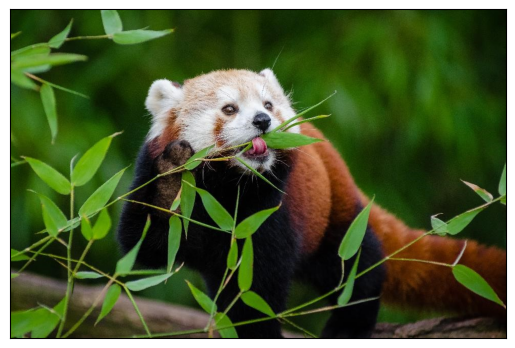

In [107]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing this lab!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)